### Przygotowanie środowiska

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stanza
import re

In [2]:
pd.set_option('display.max_rows', 1300)
pd.set_option('display.max_columns', 1300)
pd.set_option('display.width', 1300)
pd.set_option('display.max_colwidth', 100)

In [3]:
pd.set_option('display.max_colwidth', 300)

### Ładowanie danych 

In [4]:
data = pd.read_csv("zdania_irmik.csv")
# data = pd.read_csv("siz_zdania.csv")

In [5]:
data.shape

(4254, 46)

In [6]:
data.head()

,DZIECKO_ID,KOD,Pomiar,Wersja,Zdania_D_1,Zdania_D_2,Zdania_D_3,Zdania_D_4,Zdania_D_5,Zdania_D_6,Zdania_D_7,Zdania_D_8,Zdania_D_9,Zdania_D_10,Zdania_D_11,Zdania_D_12,Zdania_D_13,Zdania_D_14,Zdania_D_15,Zdania_D_16,Zdania_D_17,Zdania_D_18,Zdania_D_19,Zdania_D_20,Zdania_D_21,Zdania_D_22,Zdania_D_23,Zdania_D_24,Zdania_D_25,Zdania_D_26,Zdania_D_27,Zdania_D_28,Zdania_D_29,Zdania_D_30,Zdania_D_Uwagi,Zdania_E_1,Zdania_E_2,Zdania_E_3,Zdania_E_4,Zdania_E_5,Zdania_E_6,Zdania_E_7,Zdania_E_8,Zdania_E_9,Zdania_E_10,Zdania_E_Uwagi
0,A0280,G08072,pierwszy,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0287,G08069,pierwszy,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0290,G08064,pierwszy,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0291,G08038,pierwszy,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A0292,G08082,pierwszy,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analiza wieku badanych

In [5]:
data["wiek"] = data["KOD"].str[1:3].astype(int)

In [10]:
data["wiek"].value_counts().sort_index()

8     117
9     141
10    144
11    167
12    153
13    139
14    161
15    140
16    168
17    149
18    238
19    129
20    153
21    129
22    132
23    146
24    130
25    158
26    144
27    145
28    138
29    125
30    151
31    139
32    150
33    144
34    128
35    159
36    135
37      1
40      1
Name: wiek, dtype: int64

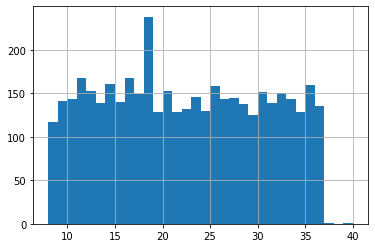

In [12]:
data["wiek"].hist(bins = 32)

In [6]:
data_melted = data.melt(id_vars = ["KOD", "wiek", "DZIECKO_ID", "Pomiar", "Wersja", "Zdania_D_Uwagi", "Zdania_E_Uwagi"], value_name = "zdanie", var_name="typ_zdania")

In [7]:
data_melted.shape

(170160, 9)

#### Liczba zdań w danym wieku

In [30]:
wiek_n_zdanie = data_melted.groupby(["KOD", "wiek"]).agg({"zdanie" : "count"}).reset_index().groupby("wiek").mean()
wiek_n_zdanie

,zdanie
wiek,
8,0.008621
9,0.124031
10,0.000000
11,0.122449
12,0.255814
13,0.186441
14,0.438849
15,0.568966
16,0.482993


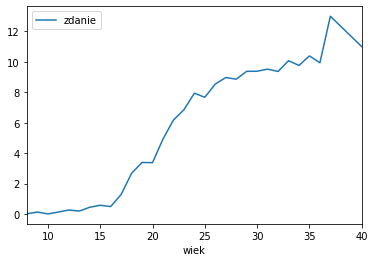

In [31]:
wiek_n_zdanie.plot()

In [32]:
wiek_zdanie = data_melted.groupby(["KOD", "wiek"]).agg({"zdanie" : "count"}).reset_index()
wiek_zero_zdan = wiek_zdanie.loc[wiek_zdanie.zdanie==0]

In [33]:
wiek_zero_zdan.wiek.value_counts().sort_index()

8     115
9     126
10    123
11    141
12    118
13    113
14    116
15     96
16    127
17     90
18    118
19     62
20     65
21     49
22     33
23     39
24     29
25     31
26     20
27     23
28     15
29     15
30     17
31     14
32     15
33      7
34      9
35     10
36     12
Name: wiek, dtype: int64

### Procentowo liczba dzieci, która nie wypowiedziała żadnego zdania

In [34]:
procent_wiek = wiek_zero_zdan.wiek.value_counts().sort_index()/wiek_zdanie.wiek.value_counts().sort_index()
procent_wiek

8     0.991379
9     0.976744
10    1.000000
11    0.959184
12    0.914729
13    0.957627
14    0.834532
15    0.827586
16    0.863946
17    0.714286
18    0.538813
19    0.496000
20    0.464286
21    0.422414
22    0.284483
23    0.314516
24    0.258929
25    0.221429
26    0.158730
27    0.181102
28    0.121951
29    0.137615
30    0.123188
31    0.117647
32    0.112782
33    0.053846
34    0.081081
35    0.073529
36    0.101695
37         NaN
40         NaN
Name: wiek, dtype: float64

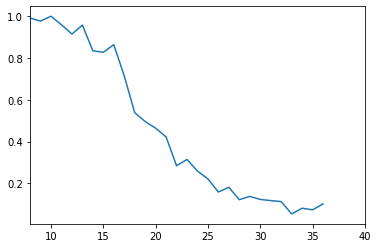

In [35]:
procent_wiek.plot()

### długość zdań

In [36]:
data_melted["dl_zdan"] = data_melted.zdanie.str.split(" ").str.len()

In [37]:
wiek_dl_zdan = data_melted.groupby(["KOD", "wiek"]).agg({"dl_zdan" : "mean"}).reset_index().groupby("wiek").mean()
wiek_dl_zdan

,dl_zdan
wiek,
8,2.000000
9,1.955556
10,NaN
11,2.750000
12,1.954545
13,2.115000
14,2.251449
15,2.176667
16,2.239286


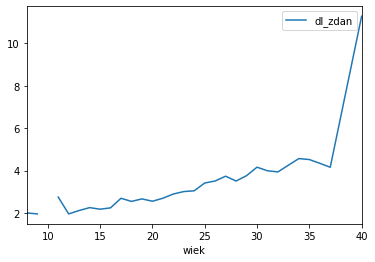

In [38]:
wiek_dl_zdan.plot()

In [39]:
data_melted.loc[data_melted["KOD"]=="Z20066", :]

,KOD,wiek,DZIECKO_ID,Pomiar,Wersja,Zdania_D_Uwagi,Zdania_E_Uwagi,typ_zdania,zdanie,dl_zdan
44,Z20066,20,A0358,pierwszy,Z,NaN,[W bloku E napisano] j.w. [Przepisałem 3 pierwsze wypowiedzenia z bloku D.],Zdania_D_1,Brum brum z mamą.,4.0
4298,Z20066,20,A0358,pierwszy,Z,NaN,[W bloku E napisano] j.w. [Przepisałem 3 pierwsze wypowiedzenia z bloku D.],Zdania_D_2,Ba z mamą/tatą.,3.0
8552,Z20066,20,A0358,pierwszy,Z,NaN,[W bloku E napisano] j.w. [Przepisałem 3 pierwsze wypowiedzenia z bloku D.],Zdania_D_3,Mama/tata cho.,2.0
12806,Z20066,20,A0358,pierwszy,Z,NaN,[W bloku E napisano] j.w. [Przepisałem 3 pierwsze wypowiedzenia z bloku D.],Zdania_D_4,Bim bam bam.,3.0
17060,Z20066,20,A0358,pierwszy,Z,NaN,[W bloku E napisano] j.w. [Przepisałem 3 pierwsze wypowiedzenia z bloku D.],Zdania_D_5,NaN,NaN
21314,Z20066,20,A0358,pierwszy,Z,NaN,[W bloku E napisano] j.w. [Przepisałem 3 pierwsze wypowiedzenia z bloku D.],Zdania_D_6,NaN,NaN
25568,Z20066,20,A0358,pierwszy,Z,NaN,[W bloku E napisano] j.w. [Przepisałem 3 pierwsze wypowiedzenia z bloku D.],Zdania_D_7,NaN,NaN
29822,Z20066,20,A0358,pierwszy,Z,NaN,[W bloku E napisano] j.w. [Przepisałem 3 pierwsze wypowiedzenia z bloku D.],Zdania_D_8,NaN,NaN
34076,Z20066,20,A0358,pierwszy,Z,NaN,[W bloku E napisano] j.w. [Przepisałem 3 pierwsze wypowiedzenia z bloku D.],Zdania_D_9,NaN,NaN
38330,Z20066,20,A0358,pierwszy,Z,NaN,[W bloku E napisano] j.w. [Przepisałem 3 pierwsze wypowiedzenia z bloku D.],Zdania_D_10,NaN,NaN


In [40]:
data_melted.head()

,KOD,wiek,DZIECKO_ID,Pomiar,Wersja,Zdania_D_Uwagi,Zdania_E_Uwagi,typ_zdania,zdanie,dl_zdan
0,G08072,8,A0280,pierwszy,G,NaN,NaN,Zdania_D_1,NaN,NaN
1,G08069,8,A0287,pierwszy,G,NaN,NaN,Zdania_D_1,NaN,NaN
2,G08064,8,A0290,pierwszy,G,NaN,NaN,Zdania_D_1,NaN,NaN
3,G08038,8,A0291,pierwszy,G,NaN,NaN,Zdania_D_1,NaN,NaN
4,G08082,8,A0292,pierwszy,G,NaN,NaN,Zdania_D_1,NaN,NaN


# Korpus analiza struktur

### Ograniczenie korpusu do dzieci w wieku 30-36 miesięcy

In [8]:
data_melted["zadanie"] = "D"
data_melted.loc[data_melted.typ_zdania.str.find("E")>=0, "zadanie"] = "E"
korpus = data_melted.loc[data_melted.wiek>=30, :]

In [9]:
korpus_full = korpus.loc[~korpus.zdanie.isnull(), :].reset_index(drop=True)
korpus_full = korpus_full[["KOD", "wiek", "DZIECKO_ID", "typ_zdania", "zdanie", "zadanie"]]
korpus_full

,KOD,wiek,DZIECKO_ID,typ_zdania,zdanie,zadanie
0,Z31019,31,A4394,Zdania_D_1,Ja chcę pić sok.,D
1,Z30013,30,A4429,Zdania_D_1,Poproszę bajkę.,D
2,Z30010,30,A4627,Zdania_D_1,Ja to chcę.,D
3,Z31018,31,A4663,Zdania_D_1,Ale tutaj jest radośniej.,D
4,Z30012,30,A4678,Zdania_D_1,Włącz mi to.,D
...,...,...,...,...,...,...
8673,Z33012,33,A5347,Zdania_E_10,Nie możesz grać z nami.,E
8674,Z30010,30,A5798,Zdania_E_10,"Co tak kopies w ten fotelik Julecku? Chces sam sie uśpić? Ja Ci pomogę. Buju, buju mały zbóju.",E
8675,Z35109,35,A6640,Zdania_E_10,Bo kotek nie może jeść kaszki bo go będzie bolał brzuch i będzie musiał pojechać do szpitala. Prawda mamo?,E
8676,Z35011,35,A6985,Zdania_E_10,Czy mogę spać u babci?,E


In [18]:
stanza.download('pl')
nlp = stanza.Pipeline('pl')

2020-10-18 20:17:31 INFO: Downloading default packages for language: pl (Polish)...
2020-10-18 20:17:32 INFO: File exists: /Users/sprzygocka/stanza_resources/pl/default.zip.
2020-10-18 20:17:34 INFO: Finished downloading models and saved to /Users/sprzygocka/stanza_resources.
2020-10-18 20:17:34 INFO: Loading these models for language: pl (Polish):
| Processor | Package |
-----------------------
| tokenize  | pdb     |
| pos       | pdb     |
| lemma     | pdb     |
| depparse  | pdb     |

2020-10-18 20:17:34 INFO: Use device: cpu
2020-10-18 20:17:34 INFO: Loading: tokenize
2020-10-18 20:17:34 INFO: Loading: pos
2020-10-18 20:17:35 INFO: Loading: lemma
2020-10-18 20:17:35 INFO: Loading: depparse
2020-10-18 20:17:37 INFO: Done loading processors!


In [12]:
def first_clean(sentence):
    sentence=re.sub('\(.+\)', '', sentence) #usuwa wszystkie zdania w nawiasach
    sentence=re.sub('/|=',' ',sentence) #usuwa wszystkie znaki "/" oraz "=", zastępując je spacjami
    sentence=re.sub(r'[^\w\s]','',sentence) #usuwa interpunkcję
    sentence=sentence.lower() #zamienia wszystkie litery na małe
    return sentence

In [13]:
korpus_full["zdania_clean"] = None
for i in korpus_full.index:
    korpus_full.loc[i, "zdania_clean"] = first_clean(korpus_full.loc[i, 'zdanie'])

In [19]:
def morfoanalyse(sentence):
    success = True
    try:
        doc = nlp(sentence)
    except:
        success = False
        sentence = clean_sentece(sentence)
        doc = nlp(sentence)
    sentence_analysis=""
    for word in doc.sentences[0].words:
        word_analysis=word.pos + "|" + str(word.feats) + "|" + word.deprel + "|" + str(word.head) + "|" + word.lemma
        sentence_analysis = sentence_analysis + word_analysis + " "
    return sentence_analysis, success

In [195]:
def clean_sentece(sentence):
#     print(sentence)
    sentence = re.sub("ł[ae]?(by)?[mś] ", "ć ",sentence)
    sentence = re.sub("ł[ae]?(by)?[mś]$", "ć ",sentence)
    sentence = re.sub("(by)?ś((my)|(cie))", "",sentence)
    sentence = sentence.replace(" bym", " by").replace(" byś", " by")
    sentence = sentence.replace("bym", "").replace("byś", "")
    return sentence

In [50]:
# korpus_full.loc[korpus_full.analiza.isnull(), :]

In [28]:
korpus_full.shape

(8678, 9)

In [51]:
korpus_full["analiza"] = None
korpus_full["nieudana"] = None
for i in korpus_full.index:
    korpus_full.loc[i, ["analiza", "nieudana"]] = morfoanalyse(korpus_full.loc[i, 'zdania_clean'])

In [52]:
korpus_full.nieudana.value_counts()

True     8319
False     359
Name: nieudana, dtype: int64

In [179]:
korpus_full.to_csv("korpus_3i4_latki_analiza.csv", index = False)

In [198]:
words_size = korpus_full.zdania_clean.str.split().apply(len).sum()
frequency_table = pd.DataFrame(np.nan, index=range(0,  words_size), 
                               columns=["KOD", "wiek", "DZIECKO_ID", "typ_zdania", "zadanie", "zdanie", "slowo", "poprawne", "lemma", "pos", "tagi"])

In [163]:
frequency_table.loc[~frequency_table.KOD.isnull(), :].tail()

,KOD,wiek,DZIECKO_ID,typ_zdania,zadanie,slowo,poprawne,lemma,pos,tagi
86,Z32012,32.0,A5084,Zdania_D_1,D,rady,True,rada,NOUN,Case=Gen|Gender=Fem|Number=Sing
87,Z32013,32.0,A5099,Zdania_D_1,D,mama,True,mama,NOUN,Case=Nom|Gender=Fem|Number=Sing
88,Z32013,32.0,A5099,Zdania_D_1,D,ja,True,ja,PRON,Animacy=Hum|Case=Nom|Gender=Masc|Number=Sing|Person=1|PronType=Prs
89,Z32013,32.0,A5099,Zdania_D_1,D,piciu,True,pić,NOUN,Aspect=Imp|Case=Loc|Gender=Neut|Number=Sing|Polarity=Pos|VerbForm=Vnoun
90,Z32013,32.0,A5099,Zdania_D_1,D,kupiłem,NaN,NaN,NaN,NaN


In [199]:
k = 0
for ind in korpus_full.index:
    a = korpus_full.loc[ind, :]
    zdanie = a["zdania_clean"].split()
    frequency_table.loc[k:len(zdanie)+k-1, 
                        ["KOD", 
                         "wiek", 
                         "DZIECKO_ID", 
                         "typ_zdania", 
                         "zadanie",
                         "zdanie"]] = [a["KOD"], a["wiek"], a["DZIECKO_ID"], a["typ_zdania"], a["zadanie"], a["zdania_clean"]]
    try:
        doc = nlp(a["zdania_clean"])
    except:
        sentence = clean_sentece(a["zdania_clean"])
        doc = nlp(sentence)
    morfo  = doc.sentences[0].words
    j = 0
#     print(ind, a["zdania_clean"])
    for i in range(len(zdanie)):
        frequency_table.loc[k, "slowo"] = zdanie[i]
        try:
            if j < len(morfo):
                if (i+1) == morfo[j].id:
                    morfo_word = morfo[j]
                    if zdanie[i] == morfo_word.text:
                        frequency_table.loc[k, ["poprawne"]] = True
                    else:
                        frequency_table.loc[k, ["poprawne"]] = False
                    frequency_table.loc[k, ["lemma", "pos", "tagi"]] = [morfo_word.lemma, morfo_word.pos, morfo_word.feats]
                    j = j+1
        except:
            print(ind, a["zdania_clean"])         
        k = k+1   

In [201]:
frequency_table.to_csv("frequency_table2.csv", index = False)

In [200]:
frequency_table.loc[frequency_table.poprawne!=True, :].shape

(557, 11)

In [203]:
frequency_table = pd.read_csv("frequency_table2_copy.csv")

## Frekwencja słów

In [247]:
n_slow = frequency_table.slowo.nunique()
n_dzieci = frequency_table.DZIECKO_ID.nunique()

In [248]:
freq_slowo = frequency_table.groupby("slowo").agg({"KOD":"count", "DZIECKO_ID":"nunique"}).reset_index()

In [249]:
freq_slowo.columns = ["slowo", "liczba_wystapien", "liczba_dzieci"]
freq_slowo["czestosc_wystapien"] = freq_slowo["liczba_wystapien"]/n_slow
freq_slowo["czestosc_dzieci"] = freq_slowo["liczba_dzieci"]/n_dzieci

In [250]:
freq_slowo = freq_slowo[["slowo", "liczba_wystapien", "czestosc_wystapien", "liczba_dzieci", "czestosc_dzieci"]]
freq_slowo = freq_slowo.sort_values("liczba_wystapien", ascending=False)

In [251]:
freq_slowo.to_csv("frekwencja_slow_3i4_latki.csv")

In [252]:
freq_slowo

,slowo,liczba_wystapien,czestosc_wystapien,liczba_dzieci,czestosc_dzieci
853,do,1112,0.185674,519,0.612751
2841,nie,1015,0.169477,473,0.558442
2503,mi,935,0.156120,443,0.523022
2721,na,756,0.126231,405,0.478158
2391,mama,712,0.118885,358,0.422668
...,...,...,...,...,...
3484,pochwaliła,1,0.000167,1,0.001181
3485,pociogiem,1,0.000167,1,0.001181
3486,pocitaś,1,0.000167,1,0.001181
1366,hałasuj,1,0.000167,1,0.001181


## Frekwencja leksemów

In [253]:
n_leksem = frequency_table.lemma.nunique()
n_dzieci = frequency_table.DZIECKO_ID.nunique()

In [254]:
freq_lemma = frequency_table.groupby("lemma").agg({"KOD":"count", "DZIECKO_ID":"nunique"}).reset_index()
freq_lemma.columns = ["lemat", "liczba_wystapien", "liczba_dzieci"]
freq_lemma["czestosc_wystapien"] = freq_lemma["liczba_wystapien"]/n_leksem
freq_lemma["czestosc_dzieci"] = freq_lemma["liczba_dzieci"]/n_dzieci

In [255]:
freq_lemma = freq_lemma[["lemat", "liczba_wystapien", "czestosc_wystapien", "liczba_dzieci", "czestosc_dzieci"]]
freq_lemma = freq_lemma.sort_values("liczba_wystapien", ascending=False)

In [256]:
freq_lemma.to_csv("frekwencja_leksemow_3i4_latki.csv")

In [257]:
freq_lemma

,lemat,liczba_wystapien,czestosc_wystapien,liczba_dzieci,czestosc_dzieci
1037,ja,1929,0.489718,587,0.693034
359,być,1551,0.393755,534,0.630460
602,do,1112,0.282305,519,0.612751
1919,nie,1015,0.257680,473,0.558442
388,chcieć,936,0.237624,424,0.500590
...,...,...,...,...,...
1708,maś,1,0.000254,1,0.001181
1709,maść,1,0.000254,1,0.001181
1710,mcdonalda,1,0.000254,1,0.001181
1712,mebelka,1,0.000254,1,0.001181


## Frekwencja tagów

In [258]:
frequency_table["tag"] = frequency_table["pos"] + ": " + frequency_table["tagi"]
frequency_table_reduced = frequency_table.loc[frequency_table.poprawne==True, :]
n_tag = frequency_table_reduced.tag.nunique()
n_dzieci = frequency_table_reduced.DZIECKO_ID.nunique()

In [259]:
freq_tag = frequency_table_reduced.groupby("tag").agg({"KOD":"count", "DZIECKO_ID":"nunique"}).reset_index()
freq_tag.columns = ["tag", "liczba_wystapien", "liczba_dzieci"]
freq_tag["czestosc_wystapien"] = freq_tag["liczba_wystapien"]/n_leksem
freq_tag["czestosc_dzieci"] = freq_tag["liczba_dzieci"]/n_dzieci

In [260]:
freq_tag = freq_tag[["tag", "liczba_wystapien", "czestosc_wystapien", "liczba_dzieci", "czestosc_dzieci"]]
freq_tag = freq_tag.sort_values("liczba_wystapien", ascending=False)

In [262]:
freq_tag.to_csv("frekwencja_tagow_3i4_latki.csv")

In [261]:
freq_tag

,tag,liczba_wystapien,czestosc_wystapien,liczba_dzieci,czestosc_dzieci
85,ADP: AdpType=Prep,2236,0.567657,646,0.762692
503,VERB: Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act,1802,0.457477,589,0.695396
339,NOUN: Case=Nom|Gender=Fem|Number=Sing,1754,0.445291,621,0.733176
507,VERB: Aspect=Imp|Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act,1555,0.394770,578,0.682409
514,VERB: Aspect=Imp|VerbForm=Inf|Voice=Act,1190,0.302107,534,0.630460
362,PART: Polarity=Neg,1013,0.257172,472,0.557261
522,VERB: Aspect=Perf|Mood=Imp|Number=Sing|Person=2|VerbForm=Fin|Voice=Act,1004,0.254887,491,0.579693
264,NOUN: Animacy=Hum|Case=Nom|Gender=Masc|Number=Sing,996,0.252856,473,0.558442
299,NOUN: Case=Acc|Gender=Fem|Number=Sing,958,0.243209,453,0.534829
379,PRON: Animacy=Hum|Case=Dat|Gender=Masc|Number=Sing|Person=1|PronType=Prs|Variant=Short,935,0.237370,443,0.523022


### Analiza morfosyntaktyczna

In [29]:
dana = pd.read_csv("otagowane_zdania_3i4latki.txt", index_col = 0)

In [30]:
dana.head()

,KOD,Zdania_D_1,Zdania_D_2,Zdania_D_3,Zdania_D_4,Zdania_D_5,Zdania_D_6,Zdania_D_7,Zdania_D_8,Zdania_D_9,Zdania_D_10,Zdania_D_11,Zdania_D_12,Zdania_D_13,Zdania_D_14,Zdania_D_15,Zdania_D_16,Zdania_D_17,Zdania_D_18,Zdania_D_19,Zdania_D_20,Zdania_D_21,Zdania_D_22,Zdania_D_23,Zdania_D_24,Zdania_D_25,Zdania_D_26,Zdania_D_27,Zdania_D_28,Zdania_D_29,Zdania_D_30,Zdania_E_1,Zdania_E_2,Zdania_E_3,Zdania_E_4,Zdania_E_5,Zdania_E_6,Zdania_E_7,Zdania_E_8,Zdania_E_9,Zdania_E_10
0,Z25017,Mama am.,"Mama, baty (herbaty).",Aciu pa pa.,Hallo baba.,Tata kici kici.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Z25017,NOUN|Case=Nom|Gender=Fem|Number=Sing|root|0 PROPN|Case=Nom|Gender=Fem|Number=Sing|flat|1 PUNCT|P...,NOUN|Case=Nom|Gender=Fem|Number=Sing|root|0 PUNCT|PunctType=Comm|punct|3 NOUN|Case=Nom|Gender=Ma...,VERB|Aspect=Imp|Mood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act|advcl|2 VERB|Asp...,PROPN|Case=Nom|Gender=Fem|Number=Sing|nsubj|2 NOUN|Case=Nom|Gender=Fem|Number=Sing|root|0 PUNCT|...,NOUN|Case=Nom|Gender=Masc|Number=Sing|SubGender=Masc1|root|0 NOUN|Case=Nom|Gender=Masc|Number=Si...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Z26014,Mamo podaj mi chusteczkę tam z szuflady mojej.,"To są moje ulubione babeczki, wiesz?",Mamo pomożesz mi? Bo Nika nie da sobie rady.,"Teraz nie jemy czekoladki, dopiero jak Zuzia przyjdzie z przedszkola to wtedy.","Zuzia, gdzie jesteś, gdzie się podziałaś?","O, zgubiłaś swoje buty? Nic się nie martw zaraz pomogę ci szukać.","Ja jestem mała, Zuzia jest mała a ty jesteś duża.",Najpierw zjem zupkę a później pojedziemy do sklepu i po Zuzie do przedszkola.,"Zuzia nie moższ teraz tego jeść, najpierw kolacja mama powiedziała , później jogurt.",Zuzia pomóż mi założyć ten szalik o tu na szyję.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nika tu siedziała i płakała, że chce do mamy, a mamy nie było i płakała tak: łeee a tata mówi ni...","A gdzie jest jest mój tata? do pracy pojechał czy do sklepu, bo nic nie powiedział.",Mamo zobacz jak się ładnie sama ubrałam - i buty i kurtkę i czapkę i szalik. Możemy już iść na s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Z26014,INTJ|None|discourse|2 VERB|Aspect=Perf|Mood=Imp|Number=Sing|Person=2|VerbForm=Fin|Voice=Act|root...,VERB|Mood=Ind|Tense=Pres|VerbForm=Fin|VerbType=Quasi|root|0 AUX|Aspect=Imp|Mood=Ind|Number=Plur|...,INTJ|None|discourse|2 VERB|Aspect=Perf|Mood=Ind|Number=Sing|Person=2|Tense=Fut|VerbForm=Fin|Voic...,ADV|None|advmod|3 PART|Polarity=Neg|advmod|3 VERB|Aspect=Imp|Mood=Ind|Number=Plur|Person=1|Tense...,PROPN|Case=Nom|Gender=Fem|Number=Sing|vocative|3 PUNCT|PunctType=Comm|punct|3 ADV|PronType=Int|r...,INTJ|None|discourse|3 PUNCT|PunctType=Comm|punct|3 VERB|Aspect=Perf|Gender=Fem|Mood=Ind|Number=S...,PRON|Case=Nom|Gender=Fem|Number=Sing|Person=1|PronType=Prs|nsubj|3 AUX|Aspect=Imp|Mood=Ind|Numbe...,ADV|None|advmod|2 VERB|Aspect=Perf|Mood=Ind|Number=Sing|Person=1|Tense=Fut|VerbForm=Fin|Voice=Ac...,PROPN|Case=Nom|Gender=Fem|Number=Sing|nsubj|3 PART|Polarity=Neg|advmod|3 VERB|Aspect=Imp|Mood=In...,PROPN|Case=Nom|Gender=Fem|Number=Sing|nsubj|2 VERB|Aspect=Perf|Mood=Imp|Number=Sing|Person=2|Ver...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PROPN|Case=Nom|Gender=Fem|Number=Sing|nsubj|3 ADV|PronType=Dem|advmod|3 VERB|Aspect=Imp|Gender=F...,CCONJ|None|cc|2 ADV|PronType=Int|root|0 AUX|Aspect=Imp|Mood=Ind|Number=Sing|Person=3|Tense=Pres|...,PROPN|Case=Voc|Gender=Fem|Number=Sing|nsubj|2 VERB|Aspect=Perf|Mood=Imp|Number=Sing|Person=2|Ver...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Z26010,"Oczywiście, że ci pomogę.",Ja będę niosła Adasiowi też picie.,Mama mi dała słodycz.,Jeszcze dwa dla tatusia.,"Daj mi to, to jest moje","Czytaj, czytaj mi baję.",Ja nie jestem chora.,"Idziemy na plac zabaw, proszę.",Nie chcę myć włosów.,Była

In [61]:
dana.KOD.value_counts()

Z27002    4
Z35013    4
Z25001    4
Z28013    4
Z25005    4
         ..
Z31080    2
Z30097    2
Z34080    2
Z36104    2
Z28105    2
Name: KOD, Length: 1324, dtype: int64

In [59]:
dana["wiek"] = dana["KOD"].str[1:3].astype(int)

In [60]:
dana["wiek"].value_counts()

35    292
33    272
32    268
30    266
31    242
25    242
36    242
26    242
27    240
34    238
28    236
29    216
37      2
40      2
Name: wiek, dtype: int64

In [56]:
dana.loc[dana.KOD=="Z27002", :]

,KOD,Zdania_D_1,Zdania_D_2,Zdania_D_3,Zdania_D_4,Zdania_D_5,Zdania_D_6,Zdania_D_7,Zdania_D_8,Zdania_D_9,Zdania_D_10,Zdania_D_11,Zdania_D_12,Zdania_D_13,Zdania_D_14,Zdania_D_15,Zdania_D_16,Zdania_D_17,Zdania_D_18,Zdania_D_19,Zdania_D_20,Zdania_D_21,Zdania_D_22,Zdania_D_23,Zdania_D_24,Zdania_D_25,Zdania_D_26,Zdania_D_27,Zdania_D_28,Zdania_D_29,Zdania_D_30,Zdania_E_1,Zdania_E_2,Zdania_E_3,Zdania_E_4,Zdania_E_5,Zdania_E_6,Zdania_E_7,Zdania_E_8,Zdania_E_9,Zdania_E_10
452,Z27002,Babcia tutaj.,"Mama, chodź.",To ja.,Nie tutaj.,Mama pić.,Tata mniam mniam.,Czekaj babcia.,Babcia auto tutaj.,"Tutaj kółka, babcia.",Tata nie ma butów.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata nie ma butów.,Tutaj kółka babcia.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,Z27002,NOUN|Case=Nom|Gender=Fem|Number=Sing|nsubj|2 ADV|PronType=Dem|root|0 PUNCT|PunctType=Peri|punct|2,NOUN|Case=Nom|Gender=Fem|Number=Sing|obl|3 PUNCT|PunctType=Comm|punct|3 VERB|Aspect=Imp|Mood=Imp...,VERB|Mood=Ind|Tense=Pres|VerbForm=Fin|VerbType=Quasi|root|0 PRON|Case=Nom|Gender=Masc|Number=Sin...,PART|Polarity=Neg|advmod|2 ADV|PronType=Dem|root|0 PUNCT|PunctType=Peri|punct|2,NOUN|Case=Nom|Gender=Fem|Number=Sing|nsubj|2 VERB|Aspect=Imp|VerbForm=Inf|Voice=Act|root|0 PUNCT...,NOUN|Case=Nom|Gender=Masc|Number=Sing|SubGender=Masc1|nsubj|2 VERB|Aspect=Imp|Mood=Ind|Number=Si...,VERB|Aspect=Imp|Mood=Imp|Number=Sing|Person=2|VerbForm=Fin|Voice=Act|root|0 NOUN|Case=Nom|Gender...,NOUN|Case=Nom|Gender=Fem|Number=Sing|nsubj|3 NOUN|Case=Nom|Gender=Neut|Number=Sing|flat|1 ADV|Pr...,ADV|PronType=Dem|root|0 NOUN|Case=Nom|Gender=Neut|Number=Plur|nsubj|1 PUNCT|PunctType=Comm|punct...,NOUN|Case=Nom|Gender=Masc|Number=Sing|SubGender=Masc1|nsubj|3 PART|Polarity=Neg|advmod|3 VERB|As...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOUN|Case=Nom|Gender=Masc|Number=Sing|SubGender=Masc1|nsubj|3 PART|Polarity=Neg|advmod|3 VERB|As...,ADV|PronType=Dem|root|0 NOUN|Case=Nom|Gender=Neut|Number=Plur|nsubj|1 NOUN|Case=Nom|Gender=Fem|N...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,Z27002,Tata idzie do pracy.,Coś dla mnie masz.,Ciocia dała mi to.,Idziemy do dziadzi.,Rano byłam w zoo.,Będę jadła obiad.,Mama idziemy na podwórko.,W sklepie widziałam kinder jajo.,Lubię kakałko.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rano byłam w zoo.,Tata idzie do pracy.,Będę jadła obiad.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749,Z27002,NOUN|Case=Nom|Gender=Masc|Number=Sing|SubGender=Masc1|nsubj|2 VERB|Aspect=Imp|Mood=Ind|Number=Si...,PRON|Case=Acc|Gender=Neut|Number=Sing|PronType=Ind|obl|4 ADP|AdpType=Prep|case|3 PRON|Case=Gen|G...,NOUN|Case=Nom|Gender=Fem|Number=Sing|nsubj|2 VERB|Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Te...,VERB|Aspect=Imp|Mood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act|root|0 ADP|AdpTy...,ADV|Degree=Pos|advmod|5 AUX|Aspect=Imp|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|V...,AUX|Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Fut|VerbForm=Fin|aux|2 VERB|Aspect=Imp|Gender...,NOUN|Case=Nom|Gender=Fem|Number=Sing|nsubj|2 VERB|Aspect=Imp|Mood=Ind|Number=Plur|Person=1|Tense...,ADP|AdpType=Prep|Variant=Short|case|2 NOUN|Case=Loc|Gender=Masc|Number=Sing|SubGender=Masc3|obl|...,VERB|Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act|root|0 ADV|Degre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADV|Degree=Pos|advmod|5 AUX|Aspect=Imp|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|V...,NOUN|Case=Nom|Gender=Masc|Number=Sing|SubGender=Masc1|nsubj|2 VERB|Aspect=Imp|Mood=Ind|Number=Si...,AUX|Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Fut|VerbForm=Fin|aux|2 VERB|Aspect=Imp|Gender...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
dana_melted = dana.melt(id_vars = ["KOD"], value_name = "zdanie", var_name="typ_zdania")

In [42]:
df1 = pd.DataFrame({"typ":["zdanie", "analiza"],"key": [0, 1]})

In [45]:
dana_melted["key"] = dana_melted.index %2

In [78]:
dana_final = pd.merge(dana_melted, df1).drop("key", axis = 1)

In [79]:
dana_final = dana_final.sort_values(["KOD", "typ_zdania"])
dana_final['group'] = dana_final.groupby(['KOD','typ_zdania', 'typ']).cumcount()+1


In [80]:
dana_final = dana_final.reset_index(drop=True)
dana_final

,KOD,typ_zdania,zdanie,typ,group
0,Z25001,Zdania_D_1,Tata chodź.,zdanie,1
1,Z25001,Zdania_D_1,Mamusiu chodź.,zdanie,2
2,Z25001,Zdania_D_1,NOUN|Case=Nom|Gender=Masc|Number=Sing|SubGender=Masc1|nsubj|2 VERB|Aspect=Imp|Mood=Imp|Number=Si...,analiza,1
3,Z25001,Zdania_D_1,VERB|Aspect=Imp|Mood=Imp|Number=Sing|Person=2|VerbForm=Fin|Voice=Act|advcl|2 VERB|Aspect=Imp|Moo...,analiza,2
4,Z25001,Zdania_D_10,NaN,zdanie,1
...,...,...,...,...,...
119995,Z40001,Zdania_E_7,NaN,analiza,1
119996,Z40001,Zdania_E_8,NaN,zdanie,1
119997,Z40001,Zdania_E_8,NaN,analiza,1
119998,Z40001,Zdania_E_9,NaN,zdanie,1


In [107]:
korpus = dana_final.set_index(['KOD', 'typ_zdania', 'group', 'typ']).unstack().reset_index()
korpus.columns = ['KOD', 'typ_zdania', 'group', 'analiza', 'zdanie']

In [108]:
korpus

,KOD,typ_zdania,group,analiza,zdanie
0,Z25001,Zdania_D_1,1,NOUN|Case=Nom|Gender=Masc|Number=Sing|SubGender=Masc1|nsubj|2 VERB|Aspect=Imp|Mood=Imp|Number=Si...,Tata chodź.
1,Z25001,Zdania_D_1,2,VERB|Aspect=Imp|Mood=Imp|Number=Sing|Person=2|VerbForm=Fin|Voice=Act|advcl|2 VERB|Aspect=Imp|Moo...,Mamusiu chodź.
2,Z25001,Zdania_D_10,1,NaN,NaN
3,Z25001,Zdania_D_10,2,NaN,NaN
4,Z25001,Zdania_D_11,1,NaN,NaN
...,...,...,...,...,...
59995,Z40001,Zdania_E_5,1,NaN,NaN
59996,Z40001,Zdania_E_6,1,NaN,NaN
59997,Z40001,Zdania_E_7,1,NaN,NaN
59998,Z40001,Zdania_E_8,1,NaN,NaN


In [112]:
korpus["wiek"] = korpus["KOD"].str[1:3].astype(int)
korpus["zadanie"] = "D"
korpus.loc[korpus.typ_zdania.str.find("E")>=0, "zadanie"] = "E"

In [113]:
korpus_small = korpus.loc[(korpus.wiek>=30) & ~(korpus.zdanie.isnull()), :]

In [114]:
korpus_small.shape

(8678, 7)

## Strona bierna
Najczęstsza konstrukcja: jestem zmęczony
Pojawia się jedno zdanie z czasownikiem "zostać": W przedszkolu opowiadała pani bajkę o czerwonym kapturku, który został zjedzony, wiek: 34

In [134]:
korpus_small.loc[korpus_small.analiza.str.find("Voice=P")>=0, ["KOD", "typ_zdania", "zdanie", "wiek"]].shape

(52, 4)

In [304]:
korpus_full.loc[korpus_full.analiza.str.find("Voice=P")>=0, ["KOD", "typ_zdania", "zdanie", "wiek"]]

,KOD,typ_zdania,zdanie,wiek
113,Z31063,Zdania_D_1,On ma zapalone światełko.,31
359,Z33006,Zdania_D_1,"Popatrz, to jest zepsute!",33
534,Z36035,Zdania_D_1,Bawiłem się w chowanego.,36
711,Z32104,Zdania_D_1,Ma śpi bo jest zmęczona.,32
964,Z31003,Zdania_D_2,Pójdziemy do przedszkola i wejdziemy po skręconych schodach.,31
1326,Z36112,Zdania_D_2,"Piotruś jest uczulony, nie może jeść czekolady.",36
1654,Z30018,Zdania_D_3,Jestem już najedzona.,30
1666,Z31040,Zdania_D_3,Jak powiem zajęte to stój.,31
1704,Z32117,Zdania_D_3,Maś zmęcione lęcie?,32
1877,Z34034,Zdania_D_3,Moja kochana Martysia.,34


In [123]:
korpus_small.loc[korpus_small.analiza.str.find("Voice=P")>=0, ["KOD", "typ_zdania", "zdanie", "wiek"]]

,KOD,typ_zdania,zdanie,wiek
24346,Z30011,Zdania_E_3,Dzisiaj byłem u babci Tereski i tam bawiłem się z Jędrusiem i on był zmęczony i poszedł na górę do łóżeczka spać.,30
24492,Z30013,Zdania_D_6,A czemu balkon jest otwarty?,30
24600,Z30016,Zdania_D_1,Jestem zmęczony.,30
24636,Z30016,Zdania_E_6,Nie jestem jeszcze zmęczony.,30
24747,Z30019,Zdania_D_7,Musi zjeść chleba wysuszonego.,30
25393,Z30039,Zdania_E_3,Pokażę Ci skarby moje ukryte w tamtym pokoju.,30
26987,Z30084,Zdania_D_7,Ten mały przewrócony.,30
26990,Z30084,Zdania_E_1,"Tu były ubrani, a tu rajstopy, a tu kwiatek.",30
27521,Z30098,Zdania_D_10,Jestem zmęczony chce się położyć.,30
28105,Z30120,Zdania_D_5,Mama otarte.,30


# Czas przyszły złożony z negacją

In [305]:
korpus_small.loc[korpus_small.zdanie.str.find("nie będ")>=0, ["KOD", "typ_zdania", "zdanie", "wiek"]]

,KOD,typ_zdania,zdanie,wiek
24105,Z30008,Zdania_E_2,"Zamknęłam babcię na balkonie, ale już nie będę.",30
28349,Z30126,Zdania_D_9,"Mam babolka , a mama zlobi i nie będzie.",30
29022,Z31003,Zdania_D_3,Mama nie będzie nalewać główki.,31
30988,Z31040,Zdania_D_8,"A jak nie będę miała uszu, to nie będę słychać.",31
36280,Z32053,Zdania_D_1,Ja już więcej nie będę.,32
36611,Z32063,Zdania_D_2,"Ja nie będę tego jadła, to niedobre.",32
43390,Z33102,Zdania_E_1,Obraziłem sie nie będe już prał.,33
44785,Z34004,Zdania_E_2,"Dzieci muszą zapinać pasy w samochodzie, bo pan Policjant będzie zły jak nie będą zapięte.",34
45820,Z34017,Zdania_E_1,"Jerry nie będzie spał w moim łóżeczku, bo jest za duży.",34
49531,Z35005,Zdania_D_5,Już nie będę płakać.,35


In [306]:
korpus_full.loc[korpus_full.zdanie.str.find("nie będ")>=0, ["KOD", "typ_zdania", "zdanie", "wiek"]]

,KOD,typ_zdania,zdanie,wiek
203,Z32053,Zdania_D_1,Ja już więcej nie będę.,32
1029,Z32063,Zdania_D_2,"Ja nie będę tego jadła, to niedobre.",32
1714,Z31003,Zdania_D_3,Mama nie będzie nalewać główki.,31
2046,Z35007,Zdania_D_3,Jak nie będę tego xxx.,35
2062,Z36119,Zdania_D_3,Dzisiaj nie będziemy myć główki dobrze?,36
3223,Z35005,Zdania_D_5,Już nie będę płakać.,35
4252,Z31040,Zdania_D_8,"A jak nie będę miała uszu, to nie będę słychać.",31
4782,Z36006,Zdania_D_9,O której godzinie będą domisie?,36
4795,Z30126,Zdania_D_9,"Mam babolka , a mama zlobi i nie będzie.",30
5614,Z34017,Zdania_E_1,"Jerry nie będzie spał w moim łóżeczku, bo jest za duży.",34


# Czasowniki modalne
łącznie 1586 zdań z bezokolicznikiem, wiele z nich zawiera czasowniki modalne.

chcieć, móc, musieć, 

In [137]:
korpus_small.loc[(korpus_small.zdanie.str.find("mog")>=0) | (korpus_small.zdanie.str.find("moż")>=0), ["KOD", "typ_zdania", "zdanie", "wiek"]].shape

(187, 4)

In [330]:
a = korpus_full.loc[korpus_full.analiza.str.find("|móc")>=0, :]

In [392]:
def time_extract(x):
    m = re.search("Tense=.{3,4}\|", a.analiza[59])
    if m:
        return(m.group())
    else:
        return None

In [394]:
a["czas"] = a.analiza.apply(time_extract)

/Users/sprzygocka/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [399]:
a.czas.value_counts()

Tense=Pres|    175
Name: czas, dtype: int64

In [401]:
korpus_full.loc[(korpus_full.zdanie.str.find("mógł")>=0), :]

,index,KOD,wiek,typ_zdania,zdanie,zadanie,analiza
1699,5964,Z32085,32,Zdania_D_3,"Chcę, żeby tata mi pomógł.",D,"VERB|Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act|root|0|chcieć PUNCT|PunctType=Comm|punct|6|, SCONJ|None|mark|6|żeby NOUN|Animacy=Hum|Case=Nom|Gender=Masc|Number=Sing|nsubj|6|tata PRON|Animacy=Hum|Case=Dat|Gender=Masc|Number=Sing|Person=1|PronType=Prs|Variant=Short..."
5716,71989,Z36052,36,Zdania_E_1,"Mamusiu, czy jak pójdziemy do Disney on Ice będę mógł siedzieć obok Maciusia i Mai?",E,"PROPN|Animacy=Hum|Case=Voc|Gender=Masc|Number=Sing|vocative|11|Mamusia PUNCT|PunctType=Comm|punct|1|, PART|PartType=Int|advmod|11|czy ADV|Degree=Pos|PronType=Int|advmod|5|jak VERB|Aspect=Perf|Mood=Ind|Number=Plur|Person=1|Tense=Fut|VerbForm=Fin|Voice=Act|advcl|11|pójść ADP|AdpType=Prep|case|7|do..."
6786,76416,Z32007,32,Zdania_E_3,"Strażak sam pojechał ratować kotka, bo nie mógł zejść z drzewa i się bał.",E,NOUN|Animacy=Hum|Case=Nom|Gender=Masc|Number=Sing|nsubj|3|strażak ADJ|Animacy=Hum|Case=Nom|Degree=Pos|Gender=Masc|Number=Sing|amod|1|sam VERB|Animacy=Hum|Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act|root|0|pojechać VERB|Aspect=Imp|VerbForm=Inf|Voice=Act|xcomp|3|...
7070,77070,Z33105,33,Zdania_E_3,Jak zjem obiadek będę mógł zjeść coś słodkiego?,E,ADV|Degree=Pos|PronType=Int|advmod|2|jak VERB|Aspect=Perf|Mood=Ind|Number=Sing|Person=1|Tense=Fut|VerbForm=Fin|Voice=Act|advcl|5|zjemć NOUN|Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing|obj|2|obiadek AUX|Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Fut|VerbForm=Fin|aux|5|być VERB|Animacy=Hum|A...


In [319]:
korpus_small.loc[(korpus_small.zdanie.str.find("mog")>=0) | (korpus_small.zdanie.str.find("moż")>=0), ["KOD", "typ_zdania", "zdanie", "wiek"]]

,KOD,typ_zdania,zdanie,wiek
23543,Z30001,Zdania_D_2,Tylko ja mogę to zrobić.,30
23585,Z30001,Zdania_E_2,Ja jeszcze nie mogę bo jestem za malutki.,30
23587,Z30001,Zdania_E_3,"Ty nie możesz skakać po łóżku, bo jesteś za duża.",30
23589,Z30001,Zdania_E_4,Tylko ja mogę.,30
24107,Z30008,Zdania_E_3,"Babcia smutna była i mówiła, że tak nie można robić.",30
24217,Z30010,Zdania_D_17,A ja tez mogę kajmić Julecka piejsią?,30
24225,Z30010,Zdania_D_20,Ja Ci pomogę.,30
24253,Z30010,Zdania_D_6,Cy ja tez mogę iść z wami?,30
24263,Z30010,Zdania_E_10,"Co tak kopies w ten fotelik Julecku? Chces sam sie uśpić? Ja Ci pomogę. Buju, buju mały zbóju.",30
24267,Z30010,Zdania_E_3,"Mamusiu, idzies z Juleckiem na scepienie? Cy ja tez mogę iść z wami?",30


In [131]:
korpus_small.loc[korpus_small.analiza.str.find("VerbForm=Inf")>=0, ["KOD", "typ_zdania", "zdanie", "wiek"]].head(30)

,KOD,typ_zdania,zdanie,wiek
23542,Z30001,Zdania_D_2,Tata choć grać w piłkę.,30
23543,Z30001,Zdania_D_2,Tylko ja mogę to zrobić.,30
23564,Z30001,Zdania_D_3,Mati nie idzie spać.,30
23568,Z30001,Zdania_D_4,Musze posprzątać pokój.,30
23572,Z30001,Zdania_D_6,Maciek nie chciał jeść obiadu.,30
23576,Z30001,Zdania_D_8,Mogę zjeść ciastko?,30
23581,Z30001,Zdania_E_1,Tata ma brodę i musi się golić.,30
23586,Z30001,Zdania_E_3,To jest ijo i jadę gasić pożar.,30
23587,Z30001,Zdania_E_3,"Ty nie możesz skakać po łóżku, bo jesteś za duża.",30
23644,Z30002,Zdania_D_3,Tata daj mi pić.,30


In [132]:
korpus_small.loc[korpus_small.analiza.str.find("VerbForm=Inf")>=0, ["KOD", "typ_zdania", "zdanie", "wiek"]].tail(30)

,KOD,typ_zdania,zdanie,wiek
59560,Z36110,Zdania_D_1,Chce mi się pić.,36
59571,Z36110,Zdania_D_2,Nie chcę spać.,36
59589,Z36110,Zdania_D_9,Już chcę iść spać.,36
59602,Z36111,Zdania_D_11,"Mamusiu, mogę zjeść jogurt z księżniczkami?",36
59624,Z36111,Zdania_D_4,"Tatuś jest daleko, bo pojechał zarabiać.",36
59627,Z36111,Zdania_D_7,Idę kupić tort dla Peppy.,36
59629,Z36111,Zdania_D_9,Chciałabym dostać kasę i taki sklep.,36
59630,Z36111,Zdania_E_1,Najbardziej lubię oglądać świnkę Peppę.,36
59632,Z36111,Zdania_E_2,Pójdziemy na plac zabaw i będziemy się bawić i będę robiła babki i w sklepie kupimy krówki.,36
59633,Z36111,Zdania_E_3,"Będę patrzeć, czy już idzie do nas św. Mikołaj",36
